<a href="https://colab.research.google.com/github/cowsilver57/sessac_test/blob/main/11%EC%9B%94_17%EC%9D%BC_(%EA%B8%88)_Day_52_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch


##Scikit-learn Dataset

### sklearn.datasets.make_blobs

*   cluster 형태로 data를 만들어주는 함수



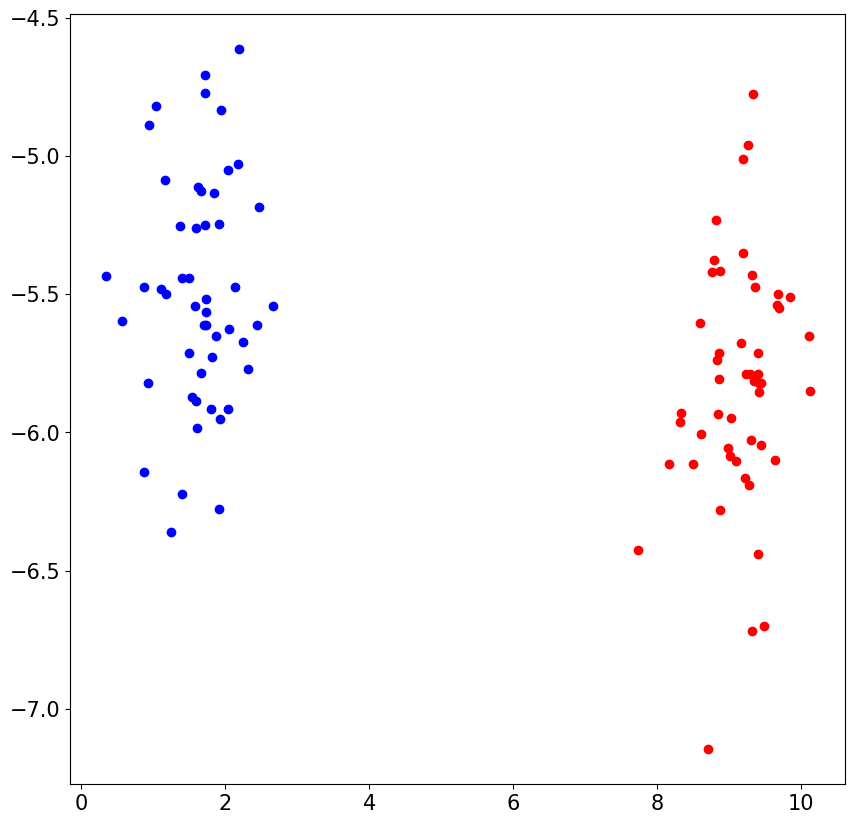

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 100
#5개의 중심(클러스터)를 가상의 데이터셋 생성함.
#각 샘플은 5개의 특성을 가지며, 표준편차는 0.5로 설정됨.
X, y = make_blobs(n_samples=n_samples, centers=2, n_features=2, cluster_std=0.5)

fig, ax = plt.subplots(figsize=(10,10))

#클러스터 레이블이 1인 경우와 0인 경우를 나누어 각각 X_pos와 X_neg에 저장함.
X_pos, X_neg = X[y==1], X[y==0]
ax.scatter(X_pos[:,0], X_pos[:,1], color='blue')
ax.scatter(X_neg[:,0], X_neg[:,1], color='red')

ax.tick_params(labelsize=15)
plt.show()

### sklearn.datasets.make_moons

*   초승달 모양의 데이터셋을 생성하는 함수

-> 비선형 분류 모델을 훈련 시킬 때, 다항 특성을 필요로 하는 모델의 성능을 평가할 때 사용

-> make_moons로 만들어지는 datasets은 직선으로 나눌 수 없음!! 여러 레이어들을 이용하여 모델을 만들어야 함.



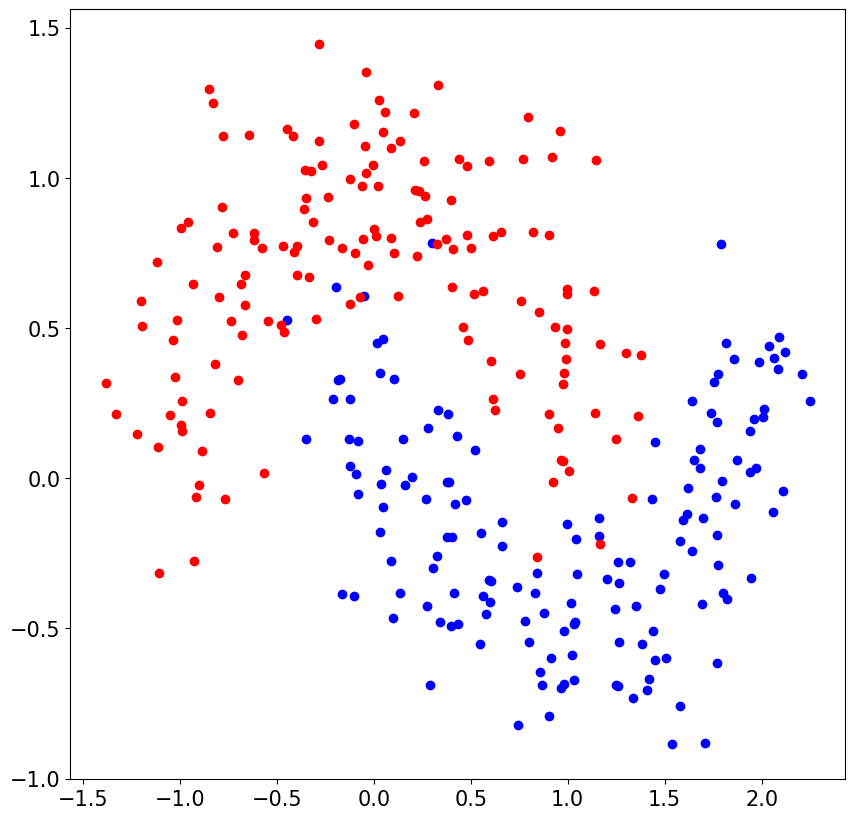

In [11]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

n_samples = 300
X, y = make_moons(n_samples=n_samples, noise=0.2)

fig, ax = plt.subplots(figsize=(10,10))

X_pos, X_neg = X[y==1], X[y==0]
ax.scatter(X_pos[:,0], X_pos[:,1], color='blue')
ax.scatter(X_neg[:,0], X_neg[:,1], color='red')

ax.tick_params(labelsize=15)
plt.show()

## PyTorch Dataset으로 만들기

In [14]:
from sklearn.datasets import make_blobs

#torch는 딥러닝 모델을 구축하고 훈련하는데 사용되는 프레임.
import torch
#PyTorch의 TensorDataset 클래스를 가져옴.
#Dataset 클래스를 상속하여 텐서 형태의 데이터와 레이블을 쉽게 관리할 수 있도록 도와줌.
from torch.utils.data import TensorDataset

n_samples = 100
X, y = make_blobs(n_samples=n_samples, centers=2, n_features=2, cluster_std=0.7)

#X와 레이블 y를 각각 PyTorch의 FloatTensor로 변환하여 TensorDataset에 저장
dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))
#TensorDataset을 통해 생성된 데이터셋을 돌면서 1번째 샘플 입력 데이터 X_, 레이블 y_를 출력
#이때, X_와 y_는 PyTorch의 텐서 형태, 각각의 형태(shape)와 데이터 타입(dtype)이 출력됨
#코드에서 break를 사용하여 1번째 샘플만 출력하고 루프를 종료
for X_, y_ in dataset:
    print(type(X_), X_.shape, X_.dtype)
    print(type(y_), y_.shape, y_.dtype)
    break

<class 'torch.Tensor'> torch.Size([2]) torch.float32
<class 'torch.Tensor'> torch.Size([]) torch.float32


In [15]:
from sklearn.datasets import make_blobs

import torch
#DataLoader는 데이터를 미니배치로 나주는 유틸리티 클래스
from torch.utils.data import TensorDataset, DataLoader

n_samples = 100
X, y = make_blobs(n_samples=n_samples, centers=2, n_features=2, cluster_std=0.7)

#X에 특성 데이터, y에는 각 데이터 포인트의 소속된 클러스터 레이블이 저장됨.
dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))

BATCH_SIZE = 8
#DataLoader를 사용하여 Dataset을 MiniBatch로 나누어주는 Dataloader를 생성
#이때, batch_size 매개변수에는 MiniBatch의 크기를 설정
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)

for X_, y_ in dataloader:
    print(type(X_), X_.shape, X_.dtype)
    print(type(y_), X_.shape, X_.dtype)
    break

<class 'torch.Tensor'> torch.Size([8, 2]) torch.float32
<class 'torch.Tensor'> torch.Size([8, 2]) torch.float32


### Practice

* make_moons를 PyTorch의 dataset, dataloader로 만들어보기
* 이 때, batch size는 16으로 설정하기



In [17]:
from sklearn.datasets import make_moons

import torch
from torch.utils.data import TensorDataset, DataLoader

n_samples = 100
X, y   = make_moons(n_samples=n_samples, noise=0.2)

dataset = TensorDataset(torch.FloatTensor(X), torch.FloatTensor(y))
for X_, y_ in dataset:
    print(type(X_), X_.shape, X_.dtype)
    print(type(y_), X_.shape, X_.dtype)
    break

BATCH_SIZE = 16
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE)
for X_, y_ in dataset:
    print(type(X_), X_.shape, X_.dtype)
    print(type(y_), X_.shape, X_.dtype)
    break

<class 'torch.Tensor'> torch.Size([2]) torch.float32
<class 'torch.Tensor'> torch.Size([2]) torch.float32
<class 'torch.Tensor'> torch.Size([2]) torch.float32
<class 'torch.Tensor'> torch.Size([2]) torch.float32


In [ ]:
import torch
from sklearn.datasets import make_blobs
from sklearn.datasets import TensorDataset, DataLoader

N_SAMPLES = 100
BATCH_SIZE = 8

#중간에 더 채워넣어야 함!!

class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()

        self.fc = nn.Linear(in_features=2, out_features=1)
        self.fc_act = nn.Sigmoid()

    def forward(self,x):
        x = self.fc(x)
        x = self.fc_act(x)

        #형태를 (B,1)에서 (B, )의 벡터로 만들어주기
        x = x.view(-1)
        return x

##PyTorch Layers

###nn.Linear(Affine)



*   nn = neural network Module
*   fc = fully connected layer (layer는 설정 가능)
*   nn.Linear : fully connected layer
*   in_features: 입력되는 데이터의 차원
*   out_features: 출력할 데이터의 차원
*   -> 출력할 데이터의 차원은 곧 레이어가 가지는 뉴런의 개수
*   뉴런 하나는 8개의 weight와 1개의 bias를 가짐


In [18]:
#PyTorch의 neural network 모듈 불러오기
import torch.nn as nn
fc = nn.Linear(in_features=8, out_features=4)

print(fc.weight.shape)
print(fc.bias.shape)

torch.Size([4, 8])
torch.Size([4])


In [20]:
#PyTorch 가져오기
import torch
#PyTorch의 neural network 모듈 가져오기
import torch.nn as nn

#크리가 (16,8)인 표준 정규 분포를 따르는 난수로 채워진 텐서 생성
test_input = torch.randn(size=(16,8))
#입력 차원이 8이고 출력 차원이 4인 layer 설정
#따라서 이 레이어에는 4개의 뉴런이 있고, 각 뉴런은 8개의 weight와 1개의 bias를 가짐.
fc = nn.Linear(in_features=8, out_features=4)
test_output = fc(test_input)

print(f"Test input: {test_input.shape}")
print(f"Test output: {test_output.shape}")

Test input: torch.Size([16, 8])
Test output: torch.Size([16, 4])


###nn.Sigmoid

In [21]:
import torch
import torch.nn as nn

test_input = torch.randn(size=(2,3))
sigmoid = nn.Sigmoid()
test_output = sigmoid(test_input)

print("============Test Input============")
print(test_input, '\n')

print("============nn.Sigmoid Output============")
print(test_output, '\n')

print("============Manual Computation============")
print(1/(1+torch.exp(-test_input)))

============Test Input============
tensor([[ 1.2976,  1.0499, -0.4337],
        [ 0.4604, -1.1799, -0.3649]]) 

============nn.Sigmoid Output============
tensor([[0.7854, 0.7408, 0.3932],
        [0.6131, 0.2351, 0.4098]]) 

============Manual Computation============
tensor([[0.7854, 0.7408, 0.3932],
        [0.6131, 0.2351, 0.4098]])


###nn.BCELoss

In [22]:
import torch
import torch.nn as nn

test_pred = torch.tensor([0.8])
test_y = torch.tensor([1.])

loss_function = nn.BCELoss()
test_output = loss_function(test_pred, test_y)

print("====== Test Input ======")
print("pred: ", test_pred)
print("y: ", test_y, '\n')

print("====== nn.BCELoss Output ======")
print(test_output, '\n')

print("====== Manual Computation ======")
print(-(test_y * torch.log(test_pred) + (1 - test_y) * torch.log(1 - test_pred)))

====== Test Input ======
pred:  tensor([0.8000])
y:  tensor([1.]) 

====== nn.BCELoss Output ======
tensor(0.2231) 

====== Manual Computation ======
tensor([0.2231])


##PyTorch Model

### PyTorch Model의 기본 구조

In [ ]:
#아주 아주 중요하니 진짜 진짜 외우기!
import torch.nn as nn

#클래스는 PyTorch의 nn.Module 클래스를 상속받음.
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

    def forward(self,x):
        pass

### nn.Linear, nn.Sigmoid로 Model 만들기

*   Layer를 3개를 깔아야 함.
*   x ㅌ R10 : 1개의 데이터에 10개의 feature (1,10)의 shape임.



In [25]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(in_features=10, out_features=5)
        self.fc1_act = nn.Sigmoid()

        self.fc2 = nn.Linear(in_features=5, out_features=2)
        self.fc2_act = nn.Sigmoid()

        self.fc3 = nn.Linear(in_features=2, out_features=1)
        self.fc3_act = nn.Sigmoid()

    def forward(self,x):
        x = self.fc1(x)
        x = self.fc1_act(x)

        x = self.fc2(x)
        x = self.fc2_act(x)

        x = self.fc3(x)
        x = self.fc3_act(x)
        return x

#Model 적용하기
import torch

test_input = torch.randn(size=(32,10))
model = MLP()
test_output = model(test_input)

print(f"Test input: {test_input.shape}")
print(f"Test output: {test_output.shape}")

Test input: torch.Size([32, 10])
Test output: torch.Size([32, 1])
